<a href="https://colab.research.google.com/github/Arx15E/University-Proyects/blob/main/Reto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Caracterización Reto 1 fallas tecnologicas**

Espacio de trabajo en el cual se plantea el análisis de los riesgos asociados a fallas tecnológicas dentro de la operación del negocio, a partir de la base de datos registrada en Excel. Estas fallas corresponden a eventos relacionados con interrupciones de sistemas, errores de software, caídas de infraestructura tecnológica, fallos de comunicación y otros incidentes que afectan la continuidad operativa.

Los riesgos operacionales analizados se enmarcan dentro del riesgo tecnológico y se describen a través de dos variables aleatorias, construidas a partir de la información contenida en la base de datos:

Frecuencia: Indica el número de eventos de fallas tecnológicas que ocurren en un periodo de tiempo determinado (por ejemplo, por semana o por mes), según los registros históricos del archivo de Excel.

Severidad (KUSD): Representa el costo asociado a la solución de cada evento de falla tecnológica, incluyendo gastos de recuperación, soporte técnico, pérdidas por interrupción del servicio y otros costos operativos relacionados.

Es importante mencionar que el producto entre la frecuencia y la severidad permite obtener la distribución agregada de pérdidas, utilizando el enfoque LDA (Loss Distribution Approach). A partir de esta distribución se realizará la caracterización del riesgo tecnológico mediante medidas de tendencia central (media, desviación estándar) y medidas de dispersión y forma (coeficiente de asimetría y curtosis), con el fin de evaluar el impacto económico de las fallas tecnológicas sobre la operación del negocio.



0. Cargo primero las librerias de trabajo y la base de datos conjuntas a drive

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Cargo base de datos para trabajo

In [ ]:
import pandas as pd

datos = '/content/drive/MyDrive/IntegraciónDatos/1. FallasTecnológicas.xlsx'
dt = pd.read_excel(datos, sheet_name=0, header=1)
dt.head(10)

,Fechas,Transacciones Diarias,Valor Transado (millones),Transacciones Fallidas (Freq),Valor Generado Promedio (Millones),Descripción Evento
0,2009-01-01,80,14.8058,1,0.5374,"Errores visuales menores, problemas de usabili..."
1,2009-01-02,105,56.4721,4,1.1978,"Errores en la interfaz de usuario, fallas en f..."
2,2009-01-03,70,9.9760,5,0.4269,"Errores visuales menores, problemas de usabili..."
3,2009-01-04,105,18.2949,6,1.0814,"Errores en la interfaz de usuario, fallas en f..."
4,2009-01-05,130,23.4112,7,1.2105,"Errores en la interfaz de usuario, fallas en f..."
5,2009-01-06,100,31.5177,3,0.2363,"Errores visuales menores, problemas de usabili..."
6,2009-01-07,115,29.5603,1,0.2737,"Errores visuales menores, problemas de usabili..."
7,2009-01-08,90,36.4063,8,12.4245,"Caída total del sistema por más de 24 horas, p..."
8,2009-01-09,105,9.3552,1,2.3869,"Degradación del rendimiento por varias horas, ..."
9,2009-01-10,85,23.7019,7,0.3098,"Errores visuales menores, problemas de usabili..."


In [ ]:
Frecuencia = dt['Transacciones Fallidas (Freq)']
print(Frecuencia.head())

0    1
1    4
2    5
3    6
4    7
Name: Transacciones Fallidas (Freq), dtype: int64


In [ ]:
Severidad = dt['Valor Generado Promedio (Millones)'] * 1000
print("Severidad (KUSD):")
print(Severidad.head())

Severidad (KUSD):
0     537.4
1    1197.8
2     426.9
3    1081.4
4    1210.5
Name: Valor Generado Promedio (Millones), dtype: float64


In [ ]:
LDA = Frecuencia * Severidad
print("Aggregated Loss Distribution (LDA) (KUSD):")
print(LDA.head())

Aggregated Loss Distribution (LDA) (KUSD):
0     537.4
1    4791.2
2    2134.5
3    6488.4
4    8473.5
dtype: float64


In [ ]:
np.set_printoptions(suppress=True)
NI = 10  #indica el numero de clusters

counts,bin_edges=np.histogram(LDA,bins=NI)
print("El numero de datos por intervalo es:")
print(counts)
print("Los intervalos inferiores: ")
print(bin_edges[:-1])
print("Los intervalos superiores: ")
print(bin_edges[1:])
XC=(bin_edges[:-1]+bin_edges[1:])/2
print("Los centros de los intervalos son: ")
print(XC)

#Se configura la tabla
Tabla=np.column_stack((bin_edges[:-1],bin_edges[1:],XC,counts))
df=pd.DataFrame(Tabla,columns=["LI", "LS","XC","ND"])
df.head(10)

El numero de datos por intervalo es:
[533  93  37  14   9   5   3   5   1   1]
Los intervalos inferiores: 
[  142.3  11236.37 22330.44 33424.51 44518.58 55612.65 66706.72 77800.79
 88894.86 99988.93]
Los intervalos superiores: 
[ 11236.37  22330.44  33424.51  44518.58  55612.65  66706.72  77800.79
  88894.86  99988.93 111083.  ]
Los centros de los intervalos son: 
[  5689.335  16783.405  27877.475  38971.545  50065.615  61159.685
  72253.755  83347.825  94441.895 105535.965]


,LI,LS,XC,ND
0,142.30,11236.37,5689.335,533.0
1,11236.37,22330.44,16783.405,93.0
2,22330.44,33424.51,27877.475,37.0
3,33424.51,44518.58,38971.545,14.0
4,44518.58,55612.65,50065.615,9.0
5,55612.65,66706.72,61159.685,5.0
6,66706.72,77800.79,72253.755,3.0
7,77800.79,88894.86,83347.825,5.0
8,88894.86,99988.93,94441.895,1.0
9,99988.93,111083.00,105535.965,1.0


## Distribución Agregada de Pérdidas (LDA)

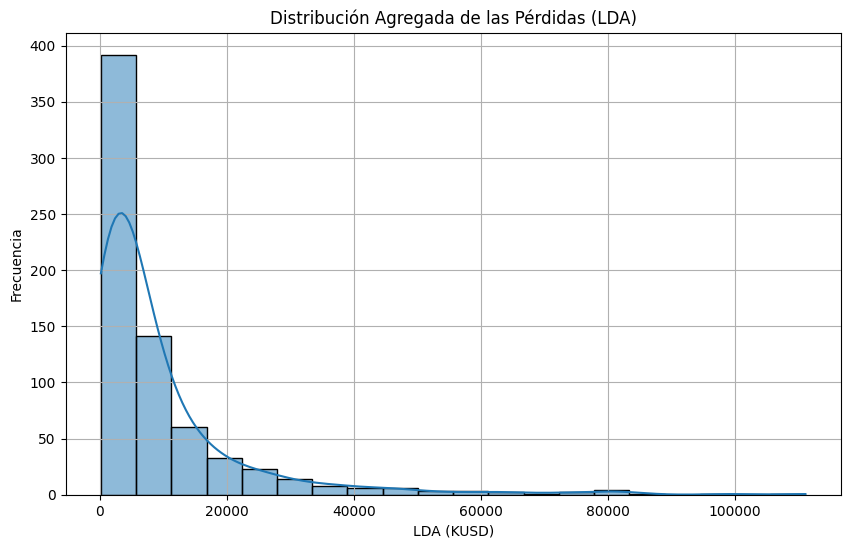

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(LDA, bins=20, kde=True)
plt.grid(True)
plt.xlabel('LDA (KUSD)')
plt.ylabel('Frecuencia')
plt.title('Distribución Agregada de las Pérdidas (LDA)')
plt.show()

## Visualización de Frecuencia, Severidad y LDA

Para una mejor visualización de los datos, se agruparán 'Frecuencia', 'Severidad' y 'LDA' en un solo DataFrame.

In [ ]:
df_analisis = pd.DataFrame({
    'Frecuencia': Frecuencia,
    'Severidad (KUSD)': Severidad,
    'LDA (KUSD)': LDA
})
print("Tabla de Frecuencia, Severidad y LDA:")
display(df_analisis.head())


Tabla de Frecuencia, Severidad y LDA:


,Frecuencia,Severidad (KUSD),LDA (KUSD)
0,1,537.4,537.4
1,4,1197.8,4791.2
2,5,426.9,2134.5
3,6,1081.4,6488.4
4,7,1210.5,8473.5


## Estadísticas Descriptivas para Frecuencia, Severidad y LDA

A continuación, se calcularán las estadísticas descriptivas para 'Frecuencia', 'Severidad' y 'LDA', incluyendo la media, desviación estándar, asimetría y curtosis, para caracterizar el riesgo tecnológico.

In [ ]:
print("\nEstadísticas Descriptivas para Frecuencia:")
display(Frecuencia.describe())
print("Skewness (Asimetría):", Frecuencia.skew())
print("Kurtosis:", Frecuencia.kurt())

print("\nEstadísticas Descriptivas para Severidad (KUSD):")
display(Severidad.describe())
print("Skewness (Asimetría):", Severidad.skew())
print("Kurtosis:", Severidad.kurt())

print("\nEstadísticas Descriptivas para LDA (KUSD):")
display(LDA.describe())
print("Skewness (Asimetría):", LDA.skew())
print("Kurtosis:", LDA.kurt())



Estadísticas Descriptivas para Frecuencia:


,Transacciones Fallidas (Freq)
count,701.000000
mean,4.753210
std,2.984796
min,1.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,16.000000


Skewness (Asimetría): 0.544837015907043
Kurtosis: -0.3647734381096437

Estadísticas Descriptivas para Severidad (KUSD):


,Valor Generado Promedio (Millones)
count,701.000000
mean,1929.554922
std,2130.130353
min,84.200000
25%,631.300000
50%,1224.000000
75%,2343.900000
max,17312.900000


Skewness (Asimetría): 2.738262112333648
Kurtosis: 9.843206827044998

Estadísticas Descriptivas para LDA (KUSD):


,0
count,701.000000
mean,9451.112696
std,13717.259090
min,142.300000
25%,1880.000000
50%,4791.200000
75%,10619.700000
max,111083.000000


Skewness (Asimetría): 3.3555449207843027
Kurtosis: 14.277896946824331


In [ ]:
from scipy.stats import kurtosis, skew

# Calculate descriptive statistics for Frecuencia
frecuencia_mean = np.mean(Frecuencia)
frecuencia_var = np.var(Frecuencia)
frecuencia_std = np.std(Frecuencia)
frecuencia_skew = skew(Frecuencia)
frecuencia_kurt = kurtosis(Frecuencia)

df_frecuencia_stats = pd.DataFrame([[frecuencia_mean, frecuencia_var, frecuencia_std, frecuencia_skew, frecuencia_kurt]],
                                 columns=["Media", "Varianza", "Desviacion Estandar", "Asimetria", "Curtosis"])
print("Estadísticas Descriptivas para Frecuencia:")
display(df_frecuencia_stats)

# Calculate descriptive statistics for Severidad
severidad_mean = np.mean(Severidad)
severidad_var = np.var(Severidad)
severidad_std = np.std(Severidad)
severidad_skew = skew(Severidad)
severidad_kurt = kurtosis(Severidad)

df_severidad_stats = pd.DataFrame([[severidad_mean, severidad_var, severidad_std, severidad_skew, severidad_kurt]],
                                 columns=["Media", "Varianza", "Desviacion Estandar", "Asimetria", "Curtosis"])
print("\nEstadísticas Descriptivas para Severidad (KUSD):")
display(df_severidad_stats)

# Calculate descriptive statistics for LDA
lda_mean = np.mean(LDA)
lda_var = np.var(LDA)
lda_std = np.std(LDA)
lda_skew = skew(LDA)
lda_kurt = kurtosis(LDA)

df_lda_stats = pd.DataFrame([[lda_mean, lda_var, lda_std, lda_skew, lda_kurt]],
                           columns=["Media", "Varianza", "Desviacion Estandar", "Asimetria", "Curtosis"])
print("\nEstadísticas Descriptivas para LDA (KUSD):")
display(df_lda_stats)

Estadísticas Descriptivas para Frecuencia:


,Media,Varianza,Desviacion Estandar,Asimetria,Curtosis
0,4.75321,8.896299,2.982666,0.54367,-0.370724



Estadísticas Descriptivas para Severidad (KUSD):


,Media,Varianza,Desviacion Estandar,Asimetria,Curtosis
0,1929.554922,4.530982e+06,2128.61046,2.732399,9.764592



Estadísticas Descriptivas para LDA (KUSD):


,Media,Varianza,Desviacion Estandar,Asimetria,Curtosis
0,9451.112696,1.878948e+08,13707.471533,3.34836,14.167714


In [ ]:
from scipy.stats import kurtosis, skew

u=np.mean(LDA)
var=np.var(LDA)
sigma=np.std(LDA)
Ida_skew = skew(LDA)
Ida_kurt = kurtosis(LDA)

T2=np.column_stack((u,var,sigma, Ida_skew, Ida_kurt))
df2=pd.DataFrame(T2,columns=["Media","Varianza","Desviacion", "Asimetria", "Kurtosis"])
df2.head(10)

,Media,Varianza,Desviacion,Asimetria,Kurtosis
0,9451.112696,1.878948e+08,13707.471533,3.34836,14.167714


## Conclusiones del Análisis de Riesgo Tecnológico

### Frecuencia de Fallas Tecnológicas:
*   **Media y Variabilidad:** La frecuencia promedio de fallas es de aproximadamente **4.75 eventos**, con una variabilidad moderada (desviación estándar de **2.98**).
*   **Distribución:** Presenta una ligera asimetría positiva (**0.54**), indicando más eventos de baja frecuencia, pero con ocurrencias ocasionales de mayor número de fallas. Es ligeramente platocúrtica (**-0.37**), sugiriendo una dispersión uniforme alrededor de la media.

### Severidad (Costo) de Fallas Tecnológicas:
*   **Media y Dispersión:** El costo promedio por falla es de **1929.55 KUSD**, con una alta dispersión (**2128.61 KUSD**), indicando gran heterogeneidad en los costos.
*   **Eventos Extremos:** La alta asimetría (**2.73**) y curtosis (**9.76**) revelan la existencia de **pocos eventos con costos extremadamente altos** que dominan el promedio, con una distribución altamente leptocúrtica (colas pesadas).

### Distribución Agregada de Pérdidas (LDA):
*   **Media y Extrema Variabilidad:** La pérdida agregada promedio es de **9451.11 KUSD**, con una desviación estándar muy alta (**13707.47 KUSD**), lo que subraya una **extrema imprevisibilidad**.
*   **Riesgo de Eventos Catastróficos:** La asimetría muy elevada (**3.35**) y la alta curtosis (**14.17**) confirman que la mayoría de las pérdidas son bajas, pero existe un **riesgo significativo de pérdidas catastróficas** debido a la combinación de alta frecuencia y/o severidad en pocos eventos.